In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

############# A Note that i have not removed some auxilary print commands which might make the notebook very long so plese comment if not needed ##################

/kaggle/input/jagritistatsimpact/test.csv
/kaggle/input/jagritistatsimpact/train.csv
/kaggle/input/jagritistatsimpact/submission.csv


In [2]:
a=pd.read_csv('/kaggle/input/jagritistatsimpact/train.csv',index_col=None)##to take in the data
del a["Id"]## not useful  as doent relate to any order of  any data
print(a)

countries=[]      #initializing the list of countries
data=[]           #initializing the list  of  data in each of the country 


a["Date"]=pd.to_datetime(a["Date"])          #to get it into the right format 
a = a.sort_values(by="Date")                 #arranging everything in chronological order to have it easy to understand the  cummulative data
day0=a["Date"].iloc[0]                       #to get the  first day of  the record to make calculation very easy
#dateno=lambda x: list(x.split(" ")[0].split("-"))
#daypass=lambda x,z: 


a["DayPassed"]=a["Date"]-day0                #To find the no of days passed
for i in range(len(a)):
    a["DayPassed"].iloc[i]=int(str(a["DayPassed"].iloc[i]).split(" ")[0])         #looping the the data to get the int value and as the hourly data is not  given 

    
a

dates=a["Date"]                 #Keeping the date data for later reference
del a["Date"]

      Province/State Country/Region      Lat      Long        Date  \
0                NaN         Poland  51.9194   19.1451  2020-03-15   
1                NaN          India  21.0000   78.0000  2020-03-04   
2                NaN        Algeria  28.0339    1.6596  2020-03-02   
3                NaN        Hungary  47.1625   19.5033  2020-03-21   
4            Arizona             US  33.7298 -111.4312  2020-02-17   
...              ...            ...      ...       ...         ...   
12988        Florida             US  27.7663  -81.6868  2020-02-07   
12989            NaN          Spain  40.0000   -4.0000  2020-03-11   
12990            NaN    Switzerland  46.8182    8.2275  2020-03-16   
12991          Jilin          China  43.6661  126.1923  2020-02-08   
12992          Hubei          China  30.9756  112.2707  2020-02-09   

       ConfirmedCases  
0                 119  
1                  28  
2                   3  
3                 103  
4                   0  
...            

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
def ratecha(a):   ## This function tries to return a approximate slope of the graph seen in the bottom with log applied to no of cases
    main=np.array(a.groupby("DayPassed")["ConfirmedCases"].sum(),dtype=np.float32) ## total no of patients in a country on each day
    if np.count_nonzero(main)==0:
        return (0,60)
    else:
        j=np.log(max(np.max(main),1))/(np.count_nonzero(main))   ## count_nonzero for the no of days that the country is suffering in the day given
        k=60-np.count_nonzero(main)
        return (min(j,20000),k)                     ## min and maxes are used to not too get a NaN or inf in the (Clipping) 

distCountri=a.groupby(['Country/Region'],sort=False)   ## to just get a distribution of countries

for i in distCountri:
    print(i)

('Dominican Republic',       Province/State      Country/Region      Lat     Long  ConfirmedCases  \
3930             NaN  Dominican Republic  18.7357 -70.1627               0   
12130            NaN  Dominican Republic  18.7357 -70.1627               0   
11208            NaN  Dominican Republic  18.7357 -70.1627               0   
10228            NaN  Dominican Republic  18.7357 -70.1627               0   
10720            NaN  Dominican Republic  18.7357 -70.1627               0   
1872             NaN  Dominican Republic  18.7357 -70.1627               0   
12414            NaN  Dominican Republic  18.7357 -70.1627               0   
2853             NaN  Dominican Republic  18.7357 -70.1627               0   
3131             NaN  Dominican Republic  18.7357 -70.1627               0   
8301             NaN  Dominican Republic  18.7357 -70.1627               0   
4834             NaN  Dominican Republic  18.7357 -70.1627               0   
12198            NaN  Dominican Republic 

In [4]:
residual=a["Province/State"]                   ##this data is not so important as the longitudes and the latitudes can take care about the region of count
del a["Province/State"]
for i in range(len(a)):
    #print(a["Country/Region"].iloc[i])        
    if a["Country/Region"].iloc[i] not in countries:
        countries.append(a["Country/Region"].iloc[i])           ## this to sort the data into country wise data scale I know it can be done by groupby class function but i choose not to
        data.append([])
    j=countries.index(a["Country/Region"].iloc[i])
    data[j].append(a.iloc[i])
print(countries)
for i in range(len(data)):
    data[i]=pd.DataFrame(data[i])            ## To convert the list of data into sub dataframes
data


l=list(zip(distCountri,countries,data))
l.sort(key=lambda x:ratecha(x[0][1]))                   ## by this the no that a country is directly proportional to the sort of rate that cases exists 
countries=[i[1] for i in l]                            ### The above step is of no use but maybe help ful to view the plot
data=[i[2] for i in l ]
distCountries=[i[0] for i in l]
print(countries)
print(data)

['Dominican Republic', 'Lebanon', 'US', 'Congo (Brazzaville)', 'Australia', 'Canada', 'Cruise Ship', 'Honduras', 'Spain', 'Austria', 'Bhutan', 'China', 'Albania', 'France', 'Equatorial Guinea', 'Seychelles', 'Denmark', 'Antigua and Barbuda', 'Kosovo', 'Guam', 'Iceland', 'Guinea', 'San Marino', 'United Kingdom', 'Croatia', 'Turkey', 'Martinique', 'Peru', 'Azerbaijan', 'Gabon', 'Argentina', 'Paraguay', 'Nepal', 'Uzbekistan', 'Saint Vincent and the Grenadines', 'Ireland', 'Republic of the Congo', 'Mexico', 'Panama', 'Liechtenstein', 'Poland', 'Saudi Arabia', 'Armenia', 'Saint Lucia', 'Kazakhstan', 'Trinidad and Tobago', 'Sweden', 'Israel', 'New Zealand', 'Belgium', 'Aruba', 'Bolivia', 'Namibia', 'Georgia', "Cote d'Ivoire", 'Ethiopia', 'Central African Republic', 'Netherlands', 'Jordan', 'Japan', 'Moldova', 'Somalia', 'Taiwan*', 'Tunisia', 'Belarus', 'Indonesia', 'Reunion', 'Greece', 'Andorra', 'Jamaica', 'Malaysia', 'Czechia', 'Morocco', 'Kuwait', 'Mauritius', 'Romania', 'Ukraine', 'Vietn

In [5]:
pd.read_csv('/kaggle/input/jagritistatsimpact/test.csv')        #just to check the test input


,Id,Province/State,Country/Region,Lat,Long,Date
0,0,Pennsylvania,US,40.5908,-77.2098,2020-01-27
1,1,NaN,Cote d'Ivoire,7.5400,-5.5471,2020-03-12
2,2,NaN,Sri Lanka,7.0000,81.0000,2020-01-23
3,3,NaN,Liechtenstein,47.1400,9.5500,2020-01-30
4,4,Gansu,China,37.8099,101.0583,2020-02-25
...,...,...,...,...,...,...
4326,4326,Puerto Rico,US,18.2208,-66.5901,2020-02-24
4327,4327,NaN,Republic of the Congo,-1.4400,15.5560,2020-01-28
4328,4328,NaN,Bangladesh,23.6850,90.3563,2020-03-01
4329,4329,Heilongjiang,China,47.8620,127.7615,2020-02-02


In [6]:
b=a
b["Day0"]=b["DayPassed"]
for i in range(len(b)):
    temp=ratecha((distCountries[countries.index(b["Country/Region"].iloc[i])])[1])## this  is useful for the model training
    b["Country/Region"].iloc[i]=temp[0]              ## stores the slope that I believe
    b["Day0"].iloc[i]=temp[1]                        ## stores the first date that the country was infected will help to get the y intercept of log plot
    
print(b)

      Country/Region      Lat      Long  ConfirmedCases  DayPassed  Day0
3930        0.379162  18.7357  -70.1627               0          0    46
11647       0.275322  33.8547   35.8623               0          0    41
10849       0.391999  44.6939  -69.3819               0          0    34
2493        0.391999  18.2208  -66.5901               0          0    34
11640       0.219722  -4.0383   21.7587               0          0    55
...              ...      ...       ...             ...        ...   ...
7827        0.391999  42.7560 -107.3025              24         60    34
12823       0.210912  21.0000   57.0000              55         60    41
10015              0   5.1521   46.1996               1         60    55
12808       0.141433  13.0000  122.0000             380         60    18
11977       0.350821 -30.5595   22.9375             274         60    44

[12993 rows x 6 columns]


In [7]:
data     #final data for representation
         ## see at the bottom    



[      Country/Region      Lat   Long  ConfirmedCases  DayPassed
 3167           Nepal  28.1667  84.25               0          0
 3688           Nepal  28.1667  84.25               1          3
 1724           Nepal  28.1667  84.25               1          4
 10570          Nepal  28.1667  84.25               1          5
 9206           Nepal  28.1667  84.25               1          6
 11328          Nepal  28.1667  84.25               1          9
 8428           Nepal  28.1667  84.25               1         10
 9090           Nepal  28.1667  84.25               1         12
 7610           Nepal  28.1667  84.25               1         15
 5202           Nepal  28.1667  84.25               1         16
 8397           Nepal  28.1667  84.25               1         17
 9409           Nepal  28.1667  84.25               1         18
 9114           Nepal  28.1667  84.25               1         19
 1590           Nepal  28.1667  84.25               1         21
 363            Nepal  28

In [8]:
b

,Country/Region,Lat,Long,ConfirmedCases,DayPassed,Day0
3930,0.379162,18.7357,-70.1627,0,0,46
11647,0.275322,33.8547,35.8623,0,0,41
10849,0.391999,44.6939,-69.3819,0,0,34
2493,0.391999,18.2208,-66.5901,0,0,34
11640,0.219722,-4.0383,21.7587,0,0,55
...,...,...,...,...,...,...
7827,0.391999,42.7560,-107.3025,24,60,34
12823,0.210912,21.0000,57.0000,55,60,41
10015,0,5.1521,46.1996,1,60,55
12808,0.141433,13.0000,122.0000,380,60,18


In [9]:
import tensorflow as tf
from tensorflow import keras



In [10]:
y=np.array(b["ConfirmedCases"],dtype=np.float32)
del b["ConfirmedCases"]                               ## the training output
y

array([  0.,   0.,   0., ...,   1., 380., 274.], dtype=float32)

In [11]:
X=np.array(b,dtype=np.float32)
X
print(y.shape)

(12993,)


In [12]:
def norm(j):
    j1=(j-np.mean(j))
    return  j1/max(abs(j1))







X=X.T
print(X)
print(X.shape)

###############test######################
y=y.reshape((1,y.shape[0]))
np.random.seed(0)
rng_state = np.random.get_state()
np.random.shuffle(X[0,:])
np.random.set_state(rng_state)
np.random.shuffle(X[1,:])
np.random.set_state(rng_state)
np.random.shuffle(X[2,:])
np.random.set_state(rng_state)
np.random.shuffle(X[3,:])
np.random.set_state(rng_state)
np.random.shuffle(X[4,:])
np.random.set_state(rng_state)
np.random.shuffle(y[0,:])

lat2=X[1,:]*X[1,:]
lat2=lat2.reshape(1,lat2.shape[0])
long2=X[2,:]*X[2,:]
long2=long2.reshape(1,long2.shape[0])
latlong=X[2,:]*X[1,:]
latlong=latlong.reshape(1,latlong.shape[0])
X=np.append(X,lat2,axis=0)
X=np.append(X,long2,axis=0)
X=np.append(X,latlong,axis=0)
## I believe normalization is not neccessary
#X[0,:]=norm(X[0,:])
#X[1,:]=norm(X[1,:])
#X[2,:]=norm(X[2,:])
#X[3,:]=norm(X[3,:])
#X[4,:]=norm(X[4,:])
#X[5,:]=norm(X[5,:])
#X[6,:]=norm(X[6,:])

print(X)
X_train=X
#X_test=X[:,10000:]
print(X_train.shape)
y_train=y
y_tlog=np.log(y_train+1)   ## this is done so as the random tree would not need to learn a exponential functional as it is a exponential function
                           ## As can be seen from the plot as if the relation is made with log of no of Cases it will be straight line
                           ## Which is easier for a random tree to learn than a exponential curve
                           ## 1 is added so that log(0) error should not  occur for which one is also subtracted at the prediction
#y_test=y[:,10000:]

[[  0.37916198   0.2753215    0.3919988  ...   0.           0.14143264
    0.3508205 ]
 [ 18.7357      33.8547      44.6939     ...   5.1521      13.
  -30.5595    ]
 [-70.1627      35.8623     -69.3819     ...  46.1996     122.
   22.9375    ]
 [  0.           0.           0.         ...  60.          60.
   60.        ]
 [ 46.          41.          34.         ...  55.          18.
   44.        ]]
(5, 12993)
[[ 1.8474385e-01  2.1972246e-01  3.9199880e-01 ...  1.8474385e-01
   0.0000000e+00  1.9965380e-01]
 [ 2.7610399e+01 -2.2957600e+01  4.4299801e+01 ...  3.1202000e+01
   1.2984300e+01  2.6000000e+01]
 [ 1.1170880e+02  1.8490400e+01 -9.9438797e+01 ...  1.2144910e+02
  -6.1287201e+01  3.0000000e+01]
 ...
 [ 7.6233417e+02  5.2705139e+02  1.9624724e+03 ...  9.7356476e+02
   1.6859204e+02  6.7600000e+02]
 [ 1.2478856e+04  3.4189490e+02  9.8880742e+03 ...  1.4749883e+04
   3.7561211e+03  9.0000000e+02]
 [ 3.0843247e+03 -4.2449521e+02 -4.4051191e+03 ...  3.7894546e+03
  -7.9577136e+02  7

In [13]:
####### These are of no  use though i did try to ensemble them tried a lot of of architecture didnt work well #######
tf.random.set_seed(2)
np.random.seed(2)
model1 = keras.Sequential([
        keras.layers.Dense(14,input_dim=7,activation="relu"),
        keras.layers.Dense(14,activation="relu"),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model1.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

tf.random.set_seed(3)
np.random.seed(3)
model2 = keras.Sequential([
        keras.layers.Dense(14,input_dim=7,activation="relu"),
        keras.layers.Dense(14,activation="relu"),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model2.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

tf.random.set_seed(13)
np.random.seed(13)
model3 = keras.Sequential([
        keras.layers.Dense(20,input_dim=7,activation="relu"),
        keras.layers.Dense(30,activation="relu"),
        keras.layers.Dense(20),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(20,activation="relu"),
        keras.layers.Dense(15),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(15),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model3.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

tf.random.set_seed(13)
np.random.seed(13)
model4 = keras.Sequential([
        keras.layers.Dense(14,input_dim=7,activation="relu"),
        keras.layers.Dense(14,activation="relu"),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model4.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

tf.random.set_seed(9)
np.random.seed(9)
model5 = keras.Sequential([
        keras.layers.Dense(14,input_dim=7,activation="relu"),
        keras.layers.Dense(14,activation="relu"),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model5.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

tf.random.set_seed(6)
np.random.seed(6)
model6 = keras.Sequential([
        keras.layers.Dense(14,input_dim=7,activation="relu"),
        keras.layers.Dense(14,activation="relu"),
        keras.layers.Dense(10),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dense(7),
        keras.layers.ReLU(),
        keras.layers.Dense(1,activation="linear"),
        
])


model6.compile(loss='mse', optimizer="adam", metrics=['mse','mae'])

#keras.metrics.RootMeanSquaredError(name='rmse')

############ End off NN############

In [14]:
#model1.fit(X_train.T,y_train.T,epochs=4000)
#model2.fit(X_train.T,y_train.T,epochs=4000)
#model3.fit(X_train.T,y_train.T,epochs=4000)
#model4.fit(X_train.T,y_train.T,epochs=4000)
#model5.fit(X_train.T,y_train.T,epochs=4000)
#model6.fit(X_train.T,y_train.T,epochs=4000)


In [15]:
from sklearn.ensemble import RandomForestRegressor
regr1 = RandomForestRegressor(n_estimators = 2000, random_state = 5)  ### n_estimators were best at 2000 as it was the best output using a test set
regr1 = regr1.fit(X_train.T,y_tlog.T)   ### The regresoin is to fit the log and not directly the no of cases 
#y_plog = regr1.predict(X_test.T)
#from sklearn import metrics
#y_pred = np.exp(y_plog)-1
#print('Accuracy Score:', metrics.mean_squared_error(y_test.T,y_pred))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
#model1.save("/kaggle/working/my_model1.h5")
#model2.save("/kaggle/working/my_model2.h5")
#model3.save("/kaggle/working/my_model3.h5")
#model4.save("/kaggle/working/my_model4.h5")
#model5.save("/kaggle/working/my_model5.h5")
#model6.save("/kaggle/working/my_model6.h5")

In [17]:
#model1 = keras.models.load_model('/kaggle/working/my_model.h5')

In [18]:
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#reg=LinearRegression()
#reg.fit(X_train.T,y_train.T)
#pred=reg.predict(X_test.T)
#print(metrics.mean_squared_error(y_test.T,pred))

In [19]:
#model1.fit(X_test.T,y_test.T,epochs=5000)

In [20]:
test=pd.read_csv("/kaggle/input/jagritistatsimpact/test.csv")  ## inputing the test data
test                     

,Id,Province/State,Country/Region,Lat,Long,Date
0,0,Pennsylvania,US,40.5908,-77.2098,2020-01-27
1,1,NaN,Cote d'Ivoire,7.5400,-5.5471,2020-03-12
2,2,NaN,Sri Lanka,7.0000,81.0000,2020-01-23
3,3,NaN,Liechtenstein,47.1400,9.5500,2020-01-30
4,4,Gansu,China,37.8099,101.0583,2020-02-25
...,...,...,...,...,...,...
4326,4326,Puerto Rico,US,18.2208,-66.5901,2020-02-24
4327,4327,NaN,Republic of the Congo,-1.4400,15.5560,2020-01-28
4328,4328,NaN,Bangladesh,23.6850,90.3563,2020-03-01
4329,4329,Heilongjiang,China,47.8620,127.7615,2020-02-02


In [21]:
del test["Id"]
residual_test=test["Province/State"]
del test["Province/State"]
test                                             ### deleting the irrelevent stuff

,Country/Region,Lat,Long,Date
0,US,40.5908,-77.2098,2020-01-27
1,Cote d'Ivoire,7.5400,-5.5471,2020-03-12
2,Sri Lanka,7.0000,81.0000,2020-01-23
3,Liechtenstein,47.1400,9.5500,2020-01-30
4,China,37.8099,101.0583,2020-02-25
...,...,...,...,...
4326,US,18.2208,-66.5901,2020-02-24
4327,Republic of the Congo,-1.4400,15.5560,2020-01-28
4328,Bangladesh,23.6850,90.3563,2020-03-01
4329,China,47.8620,127.7615,2020-02-02


In [22]:
test["Date"]=pd.to_datetime(test["Date"])          #to get it into the right format 

test["DayPassed"]=test["Date"]-day0                #To find the no of days passed
for i in range(len(test)):
    test["DayPassed"].iloc[i]=int(str(test["DayPassed"].iloc[i]).split(" ")[0])         #looping the the data to get the int value and as the hourly data is not  given 

    
test

dates=test["Date"]                 #Keeping the date data for later reference
del test["Date"]

test


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country/Region,Lat,Long,DayPassed
0,US,40.5908,-77.2098,5
1,Cote d'Ivoire,7.5400,-5.5471,50
2,Sri Lanka,7.0000,81.0000,1
3,Liechtenstein,47.1400,9.5500,8
4,China,37.8099,101.0583,34
...,...,...,...,...
4326,US,18.2208,-66.5901,33
4327,Republic of the Congo,-1.4400,15.5560,6
4328,Bangladesh,23.6850,90.3563,39
4329,China,47.8620,127.7615,11


In [23]:
testX=test
testX["Day0"]=testX["DayPassed"]
for i in range(len(testX)):
    temp=ratecha((distCountries[countries.index(testX["Country/Region"].iloc[i])])[1])
    testX["Country/Region"].iloc[i]=temp[0]
    testX["Day0"].iloc[i]=temp[1]                                               ## trying to  replicate the data manipulation done to training data
print(testX)

     Country/Region      Lat      Long  DayPassed  Day0
0          0.391999  40.5908  -77.2098          5    34
1          0.263906   7.5400   -5.5471         50    50
2         0.0979271   7.0000   81.0000          1    15
3          0.225682  47.1400    9.5500          8    44
4          0.184744  37.8099  101.0583         34    -1
...             ...      ...       ...        ...   ...
4326       0.391999  18.2208  -66.5901         33    34
4327              0  -1.4400   15.5560          6    60
4328       0.253526  23.6850   90.3563         39    47
4329       0.184744  47.8620  127.7615         11    -1
4330       0.226479  48.3794   31.1656         60    43

[4331 rows x 5 columns]


In [24]:
X=np.array(testX,dtype=np.float32)
X
lat2=X[:,1]*X[:,1]
lat2=lat2.reshape(lat2.shape[0],1)
long2=X[:,2]*X[:,2]
long2=long2.reshape(long2.shape[0],1)
latlong=X[:,2]*X[:,1]
latlong=latlong.reshape(latlong.shape[0],1)
X=np.append(X,lat2,axis=1)
X=np.append(X,long2,axis=1)
X=np.append(X,latlong,axis=1)
print(X.shape)

(4331, 8)


In [25]:
#pred=(model1.predict(X)+model2.predict(X)+model3.predict(X)+model4.predict(X)+model5.predict(X)+model6.predict(X))/6

In [26]:
pred=regr1.predict(X)
print(pred)              ## prediction

[0.00000000e+00 6.77544331e-01 5.11365438e-03 ... 4.15888309e-03
 1.44518590e-03 3.74197802e+00]


In [27]:
for i in pred:
    print(i)

0.0
0.6775443308353424
0.005113654375076294
0.0
4.521788597106934
0.0
3.277564013361931
0.6935526475906372
0.003034212827682495
0.0
0.010102215766906739
3.3620587767362595
0.0
0.0
0.0
0.0
0.09367560243606568
5.129868515968322
0.01886975145339966
4.676634685516357
1.3580728273391725
0.0
11.069538110256195
3.1090429191589357
1.1038196645975114
0.0
0.0
0.0
0.0
0.6931471824645996
0.0
0.0
0.0
2.406051098942757
2.8907428436279297
1.2514766137599944
0.0
0.7440186419486999
0.02806178879737854
0.0008047189712524414
0.0
3.208811851263046
0.0
4.8978400230407715
0.0
0.0
0.0
0.07723540377616882
3.203237807869911
0.0
6.4089548817873006
3.195094767689705
0.0
0.0
1.517937560915947
3.4820550031661988
0.7564258000850678
4.522693017721176
0.9584293897151948
0.0
6.677504746437073
0.0
0.0
0.0
6.334242870330811
4.4985417015552525
0.0
0.0
0.0
2.2582839425802232
0.0
0.3942529933452606
0.0
2.987988403439522
4.885766669750214
0.0
0.0
0.0
1.4499716836214065
0.7186847097873688
0.0
0.0
0.0
0.06085311102867126
0.01

In [28]:
predx=(np.exp(pred)-1)   ### here the prediction is taken to e's  power and subtracting 1 to remove zero error (error analysis :) )  
print(predx)            ## np.around is can be taken so as to make int value out of the float value in order to get better accuracy which is not true 
                        ## its better not to take np.around()
#print(sum(keras.losses.MSE(predx,predi)))

[0.00000000e+00 9.69036488e-01 5.12675142e-03 ... 4.16754325e-03
 1.44623068e-03 4.11813433e+01]


In [29]:
p=pd.read_csv("/kaggle/input/jagritistatsimpact/submission.csv")
p

,Id,ConfirmedCases
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
4326,4326,1
4327,4327,1
4328,4328,1
4329,4329,1


In [30]:
o=dict({'ConfirmedCases':predx})
odf=pd.DataFrame(predx)             ##trying to convert  
odf[0]

0        0.000000
1        0.969036
2        0.005127
3        0.000000
4       91.000002
          ...    
4326     0.000000
4327     0.000000
4328     0.004168
4329     0.001446
4330    41.181343
Name: 0, Length: 4331, dtype: float64

In [31]:
p["ConfirmedCases"]=odf 

In [32]:
p

,Id,ConfirmedCases
0,0,0.000000
1,1,0.969036
2,2,0.005127
3,3,0.000000
4,4,91.000002
...,...,...
4326,4326,0.000000
4327,4327,0.000000
4328,4328,0.004168
4329,4329,0.001446


In [33]:
p.to_csv("/kaggle/working/submission.csv",index=False)   ##saving the file

In [34]:

import matplotlib.pyplot as plt  ### no  use of this

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
[ 0  3  4  5  6  9 10 12 15 16 17 18 19 21 23 24 25 26 28 29 30 31 32 33
 34 35 36 37 38 40 41 42 43 44 45 46 47 48 50 51 52 53 56 57 58]


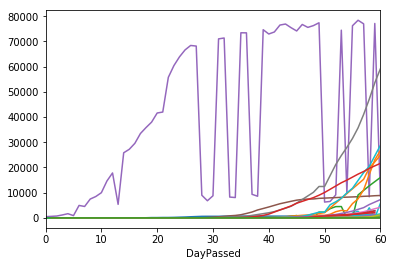

In [35]:
print(np.array(data[0].groupby('DayPassed')['ConfirmedCases'].sum()))
print(np.array( [i for i in set(data[0]['DayPassed'])] ,dtype=np.uint8 ))

for i in range(len(countries)):
    #plt.cle
    data[i].groupby('DayPassed')['ConfirmedCases'].sum().plot()     ## this plots expnential curve of total no of cases in a day vs Daypasses
    #plt.scatter((np.array((data[i].groupby('DayPassed')['ConfirmedCases']).sum())),np.array( [i for i in set(data[0]['DayPassed'])] ,dtype=np.uint8 ) )
    #plt.xlabel('DayPassed')
    #plt.ylabel(countries[i])
    #plt.show()

In [36]:
# the discountinues parts are the lack of data from maybe some province of certain part of the country

## which is asked in test data 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1]
[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 19 20 21 22 24 25 26 27 29
 30 31 33 34 37 42 44 45 46 47 48 49 50 51 53 54 55 57 58]


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-s

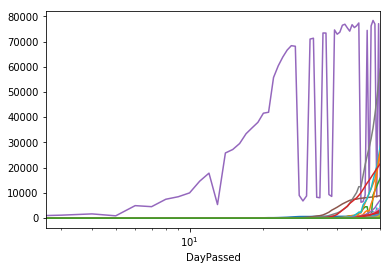

In [37]:
j=1
print(np.array(data[j].groupby('DayPassed')['ConfirmedCases'].sum()))
print(np.array( [i for i in set(data[j]['DayPassed'])] ,dtype=np.uint8 ))

for i in range(len(countries)):
    #plt.cle
    data[i].groupby('DayPassed')['ConfirmedCases'].sum().plot(logx=True)            ## this plots log(total no of cases) in a day vs Day passed

In [38]:
#Applying a log transmform every country became a straight line from the day they started so a exponential function for day passed 
## no of cases proportional to e^(daypassed-day0_for_that_country )*W_for_that_country
## I tried approximating W by the function ratecha()
## W=y2-y1/x2-x1
## W=log(maximum no of no of cases as it would only be on the last day of the data as the curve is not decreasing)/(no of days it took to reach there)
## as W is country specific
# from day0 of each country while give a good data representation of y intercept to predict the straight line without the use of lot of previous data
##as there is no identification when is day0 of the country as there is no very good way that the algorithm can make it remember
##I set that as a parameter manually  i did this being inspired by LSTM

In [39]:
set(b["Day0"])  ## this just to check 

{-1,
 3,
 8,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 27,
 31,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60}

In [40]:
####Gut Feeling###  ##3 this didnt work out so well

In [41]:
predic=np.exp(X[:,0]*(X[:,3]-X[:,4]))
print(pred)

[0.00000000e+00 6.77544331e-01 5.11365438e-03 ... 4.15888309e-03
 1.44518590e-03 3.74197802e+00]


In [42]:
p=pd.read_csv("/kaggle/input/jagritistatsimpact/submission.csv")
p

,Id,ConfirmedCases
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
4326,4326,1
4327,4327,1
4328,4328,1
4329,4329,1


In [43]:
odf=pd.DataFrame(predic)
odf[0]

0         0.000012
1         1.000000
2         0.253858
3         0.000296
4       642.929382
           ...    
4326      0.675705
4327      1.000000
4328      0.131571
4329      9.179071
4330     47.000008
Name: 0, Length: 4331, dtype: float32

In [44]:
p["ConfirmedCases"]=odf

In [45]:
p.to_csv("/kaggle/working/submissiongut.csv",index=False)

In [46]:
#This gut feeling didnt work out that well but got 1.2 accuracy
